In [1]:
# automatically show plots inside the notebook
%matplotlib inline  

# reload all modules before executing code
%load_ext autoreload
%autoreload 2  

In [2]:
# you will use this notebook as a basis to walk us through what you did

In [3]:
# import independent features  
import pandas as pd
import numpy as np
features = pd.read_csv('../data/features.csv')
features.shape

(288, 688)

There are 688 independent features for 288 patients. However, it is quiet possible that many of these features are redundant. Therefore, I employ exploratory data analysis namely univariate and bivariate analysis to eliminate redundant features.  


In [4]:
# bivariate analysis
corr_matrix = features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
features = features.drop(features[to_drop], axis=1)
features.shape

(288, 237)

As one can see, more than half of features had a correlation of more than 90% with other features. One can adjust correlation threshold on a need basis. 

In [5]:
# univariate analysis 
X = features.iloc[:, 1:].values
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0.2)
X = vt.fit_transform(X)
X.shape

(288, 171)

With univariate analysis, I try to remove those features which have variance below 0.2 . Reason being, features with lesser variance will not be able to distinguish the data effectively. 

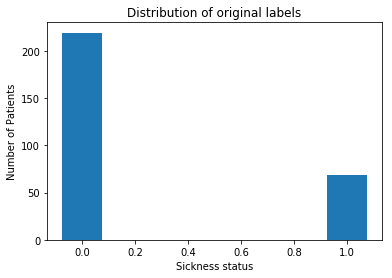

In [6]:
# import labels - 1-sick or 0-healthy
from matplotlib import pyplot as plt 
labels = pd.read_csv('../data/labels.csv')
y = labels.iloc[:, 1].values
x_1 = [0,1]
x_2 = [y.size - np.count_nonzero(y), np.count_nonzero(y)]
plt.figure(1)
plt.bar(x_1, x_2,width=0.15, align = 'center') 
plt.title('Distribution of original labels') 
plt.ylabel('Number of Patients') 
plt.xlabel('Sickness status')  
plt.show()

Distribution of labels is skewed towards helathy patients. Number of healthy patients is more than double the size of sick patients. 

In [7]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Feature scaling is an important preprocessing step since we do not wish to see one feature influencing the result more than the others. Feature scaling essentially standardizes features by removing the mean and scaling to unit variance

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
X = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(sum(explained_variance))

0.9088261438680943


PCA is a feature extraction technique. It is a unsupervised, generates topN eigen vectors with a highest variance. I selected top 50 features that account for 90% of the variance. Instead of using 688 features with 100% variance, I rather choose small subset of features to account for lesser variance. 

In [9]:
# create ANN model 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dropout(0.3, input_shape = (50,)))
classifier.add(Dense(21,  activation='relu', kernel_initializer = 'uniform'))
classifier.add(Dropout(0.5))
classifier.add(Dense(21, activation='relu', kernel_initializer='uniform'))
classifier.add(Dropout(0.5))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))


Using TensorFlow backend.


ANN has been used for binary classification task in here. It is a sequential model with 2 hidden layers and 3 regularization layers. DropOut layer reduces overfitting in this case. 

In [10]:
# compile, fit and predict 
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X, y, batch_size=10, epochs=500)
y_pred = classifier.predict(X)
y_pred = (y_pred > 0.4)

Epoch 1/500
288/288 [==============================] - 0s 1ms/step - loss: 0.6881 - acc: 0.7535
Epoch 2/500
288/288 [==============================] - 0s 139us/step - loss: 0.6721 - acc: 0.7604
Epoch 3/500
288/288 [==============================] - 0s 139us/step - loss: 0.6446 - acc: 0.7604
Epoch 4/500
288/288 [==============================] - 0s 159us/step - loss: 0.5722 - acc: 0.7604
Epoch 5/500
288/288 [==============================] - 0s 163us/step - loss: 0.5086 - acc: 0.7604
Epoch 6/500
288/288 [==============================] - 0s 156us/step - loss: 0.4986 - acc: 0.7604
Epoch 7/500
288/288 [==============================] - 0s 142us/step - loss: 0.4745 - acc: 0.7604
Epoch 8/500
288/288 [==============================] - 0s 152us/step - loss: 0.4677 - acc: 0.7604
Epoch 9/500
288/288 [==============================] - 0s 145us/step - loss: 0.4932 - acc: 0.7604
Epoch 10/500
288/288 [==============================] - 0s 149us/step - loss: 0.4518 - acc: 0.7604
Epoch 11/500
288/288 

288/288 [==============================] - 0s 132us/step - loss: 0.3480 - acc: 0.8507
Epoch 84/500
288/288 [==============================] - 0s 121us/step - loss: 0.4131 - acc: 0.8299
Epoch 85/500
288/288 [==============================] - 0s 132us/step - loss: 0.3653 - acc: 0.8542
Epoch 86/500
288/288 [==============================] - 0s 118us/step - loss: 0.3634 - acc: 0.8646
Epoch 87/500
288/288 [==============================] - 0s 128us/step - loss: 0.3684 - acc: 0.8681
Epoch 88/500
288/288 [==============================] - 0s 128us/step - loss: 0.3093 - acc: 0.8576
Epoch 89/500
288/288 [==============================] - 0s 125us/step - loss: 0.3677 - acc: 0.8472
Epoch 90/500
288/288 [==============================] - 0s 128us/step - loss: 0.3921 - acc: 0.8437
Epoch 91/500
288/288 [==============================] - 0s 118us/step - loss: 0.3490 - acc: 0.8750
Epoch 92/500
288/288 [==============================] - 0s 128us/step - loss: 0.3238 - acc: 0.8646
Epoch 93/500
288/288 [=

288/288 [==============================] - 0s 128us/step - loss: 0.2994 - acc: 0.8889
Epoch 165/500
288/288 [==============================] - 0s 132us/step - loss: 0.2863 - acc: 0.8889
Epoch 166/500
288/288 [==============================] - 0s 139us/step - loss: 0.2694 - acc: 0.8924
Epoch 167/500
288/288 [==============================] - 0s 135us/step - loss: 0.3614 - acc: 0.8403
Epoch 168/500
288/288 [==============================] - 0s 132us/step - loss: 0.2961 - acc: 0.8750
Epoch 169/500
288/288 [==============================] - 0s 132us/step - loss: 0.3716 - acc: 0.8299
Epoch 170/500
288/288 [==============================] - 0s 132us/step - loss: 0.3449 - acc: 0.8785
Epoch 171/500
288/288 [==============================] - 0s 132us/step - loss: 0.2754 - acc: 0.8715
Epoch 172/500
288/288 [==============================] - 0s 132us/step - loss: 0.3035 - acc: 0.8646
Epoch 173/500
288/288 [==============================] - 0s 132us/step - loss: 0.3233 - acc: 0.8750
Epoch 174/500


288/288 [==============================] - 0s 139us/step - loss: 0.3169 - acc: 0.8646
Epoch 247/500
288/288 [==============================] - 0s 156us/step - loss: 0.2763 - acc: 0.8854
Epoch 248/500
288/288 [==============================] - 0s 149us/step - loss: 0.2584 - acc: 0.9028
Epoch 249/500
288/288 [==============================] - 0s 142us/step - loss: 0.2790 - acc: 0.8993
Epoch 250/500
288/288 [==============================] - 0s 145us/step - loss: 0.3191 - acc: 0.8472
Epoch 251/500
288/288 [==============================] - 0s 145us/step - loss: 0.3191 - acc: 0.8854
Epoch 252/500
288/288 [==============================] - 0s 159us/step - loss: 0.2970 - acc: 0.8750
Epoch 253/500
288/288 [==============================] - 0s 156us/step - loss: 0.2364 - acc: 0.9167
Epoch 254/500
288/288 [==============================] - 0s 145us/step - loss: 0.2854 - acc: 0.8889
Epoch 255/500
288/288 [==============================] - 0s 149us/step - loss: 0.3453 - acc: 0.8715
Epoch 256/500


288/288 [==============================] - 0s 139us/step - loss: 0.2879 - acc: 0.8958
Epoch 329/500
288/288 [==============================] - 0s 132us/step - loss: 0.2840 - acc: 0.9097
Epoch 330/500
288/288 [==============================] - 0s 132us/step - loss: 0.3315 - acc: 0.8646
Epoch 331/500
288/288 [==============================] - 0s 128us/step - loss: 0.2554 - acc: 0.9097
Epoch 332/500
288/288 [==============================] - 0s 128us/step - loss: 0.2659 - acc: 0.8958
Epoch 333/500
288/288 [==============================] - 0s 128us/step - loss: 0.2770 - acc: 0.9062
Epoch 334/500
288/288 [==============================] - 0s 139us/step - loss: 0.3116 - acc: 0.8750
Epoch 335/500
288/288 [==============================] - 0s 125us/step - loss: 0.3036 - acc: 0.8854
Epoch 336/500
288/288 [==============================] - 0s 128us/step - loss: 0.3047 - acc: 0.8819
Epoch 337/500
288/288 [==============================] - 0s 128us/step - loss: 0.2959 - acc: 0.8750
Epoch 338/500


288/288 [==============================] - 0s 170us/step - loss: 0.2784 - acc: 0.8889
Epoch 411/500
288/288 [==============================] - 0s 159us/step - loss: 0.3216 - acc: 0.8681
Epoch 412/500
288/288 [==============================] - 0s 132us/step - loss: 0.3199 - acc: 0.8889
Epoch 413/500
288/288 [==============================] - 0s 125us/step - loss: 0.3062 - acc: 0.8750
Epoch 414/500
288/288 [==============================] - 0s 128us/step - loss: 0.2965 - acc: 0.9097
Epoch 415/500
288/288 [==============================] - 0s 135us/step - loss: 0.3269 - acc: 0.8750
Epoch 416/500
288/288 [==============================] - 0s 135us/step - loss: 0.3059 - acc: 0.8542
Epoch 417/500
288/288 [==============================] - 0s 128us/step - loss: 0.3594 - acc: 0.8472
Epoch 418/500
288/288 [==============================] - 0s 135us/step - loss: 0.2849 - acc: 0.8854
Epoch 419/500
288/288 [==============================] - 0s 128us/step - loss: 0.2611 - acc: 0.8958
Epoch 420/500


288/288 [==============================] - 0s 121us/step - loss: 0.2977 - acc: 0.8819
Epoch 493/500
288/288 [==============================] - 0s 135us/step - loss: 0.3014 - acc: 0.8819
Epoch 494/500
288/288 [==============================] - 0s 132us/step - loss: 0.2880 - acc: 0.8993
Epoch 495/500
288/288 [==============================] - 0s 135us/step - loss: 0.3608 - acc: 0.8472
Epoch 496/500
288/288 [==============================] - 0s 152us/step - loss: 0.2747 - acc: 0.8819
Epoch 497/500
288/288 [==============================] - 0s 246us/step - loss: 0.2717 - acc: 0.8819
Epoch 498/500
288/288 [==============================] - 0s 294us/step - loss: 0.3405 - acc: 0.8507
Epoch 499/500
288/288 [==============================] - 0s 253us/step - loss: 0.2760 - acc: 0.9028
Epoch 500/500
288/288 [==============================] - 0s 315us/step - loss: 0.3056 - acc: 0.8819


I use 500 epochs with batch size of 10 to train ANN model. Since we are more concerned about identifying sick people rather than misclassifying a healthy person, I slighly reduce the threshold to 0.4 . 

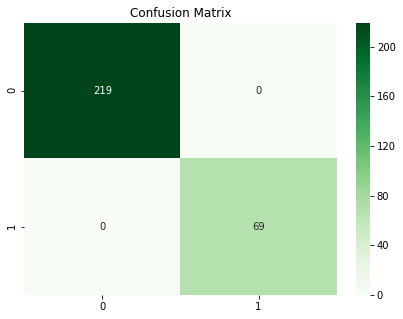

In [11]:
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sn
cm = confusion_matrix(y, y_pred)
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix')
sn.heatmap(cm, annot=True, cmap='Greens', fmt='g')

Confusion matrix is a comparison of true lables vs predicted labels. Since we have kept the prediction threshold to be 0.4, we see that there is one false positive while rest of the predictions are correct. 

In [12]:
# recall -
recall = recall_score(y, y_pred)
print(recall)

1.0


We are more concerned about false negatives (categorizing sick person as healthy) than false positives (categorizing healthy person as sick), recall is a good indicator of how well we perform in this scenario. Recall score was 1.0 when I ran for the last time. Essentially, there were no false negatives. 
Since we have taken care of overfitting through regularization, we assume prediction is stable across datasets i.e low variance. A test set could have helped me in this regard. 

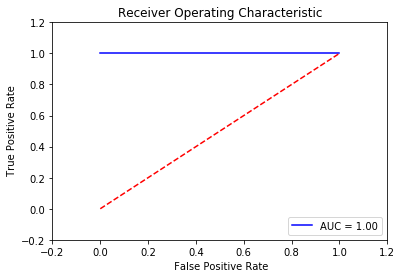

In [13]:
# roc curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(2)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.ylabel(' True Positive Rate')
plt.xlabel(' False Positive Rate')
plt.show()


Receiver operating characteristic (ROC) is used to visualize the performance of a binary classifier. It helps to select model independent of the class distribution (Fig.1). We can see that our model has the best possible performance in ROC curve. Dotted line denotes random classifier. 

Finally, We have to take this result with a pinch of salt. There is a high possibility of overfitting since dataset is really small. We could enhance the perrformance of this classifier by increasing dataset, providing a test/validation set or by cross validation etc. 